# Prueba de nuestro modelo de Pokemones 

Para llegar a este punto debiste de haber seguido todas las instrucciones anteriores 
previamente desciritas si no es asi te invito a que las sigas:

1. [instalacion](https://github.com/ErickLF/Pokedex-R-CNN/blob/master/Instalacion.md)

2. [crear tu propio conjunto de datos](https://github.com/ErickLF/Pokedex-R-CNN/blob/master/Crea_tu_propio_DataSet.md)

3. [entrenar tus datos](https://github.com/ErickLF/Pokedex-R-CNN/blob/master/clasificador_de_mascotas_en_Google_Cloud.md)

4. Tener descargado elarchivo original de [models](https://github.com/tensorflow/models), ya que este lo debemos de insertar en la carpeta object_detection de este.

*Nota: si no quieres todo el proyecto bastara con tener las carpeta slim y object_detection para que funcione* 

# Imports

In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

## Env setup

In [2]:
# Necesario para desplegar las imagenes
%matplotlib inline

# por si estamos en otra carpeta.
sys.path.append("..")

## Object detection imports
Esto lo necesitamos de la carpeta object_detection del archivo **models** original

In [3]:
from utils import label_map_util

from utils import visualization_utils as vis_util

# Model preparation 

## Variables

Este modelo lo obtuvimos al usar: `export_inference_graph.py` la carpeta generada hay que cambiarla en`PATH_TO_CKPT` por un nuevo archivo que es generado .pb.  


In [17]:
# Modelo descargado o generado debe de estar dentro de la carpeta object_detection
MODEL_NAME = 'Modelo_pokemon.pb'#nombre del graph descargado

# este archivo se encuentra dentro de la carpeta.
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

# Lista de nombres y clases (debemos guardarlo en object_detection/data).
PATH_TO_LABELS = os.path.join('data', 'pokemones.pbtxt')

NUM_CLASSES = 4

## Load a (frozen) Tensorflow model into memory.

In [18]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

## Loading label map
Esto nos indica el nombre la la clase, no hay que mover nada aquí

In [19]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

## Helper code

In [20]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection

In [30]:
# En la carpeta test_images guarda las imagenes que quieras para probar, en mi caso tengo 
#para probar de la 6-13 que son de pokemones

# La imagen se debe de llamar image seguido de un numero.
#solo hay que mover los indices del for para tus imagenes dependiendo de como as tengas acomodadas
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(6, 13) ]
#cambiar las imagenes y meter de prueba.

# Tamaño de salida de imagen.
IMAGE_SIZE = (12, 8)

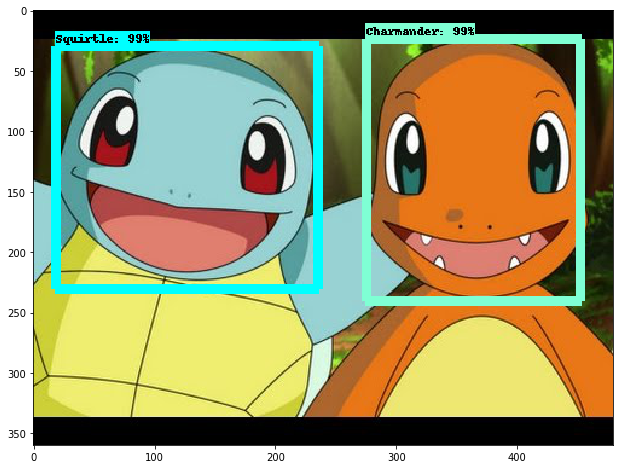

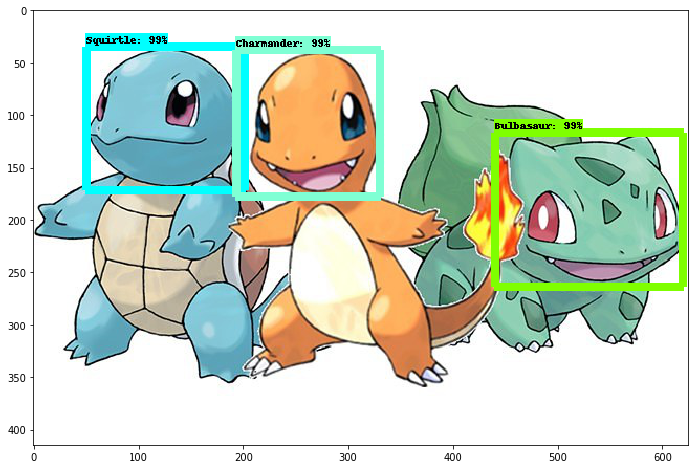

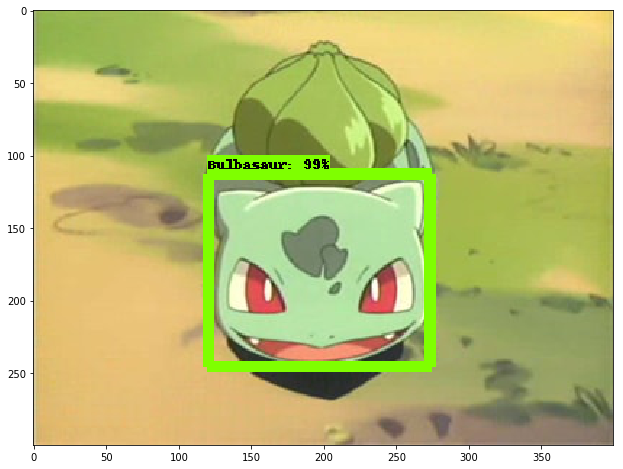

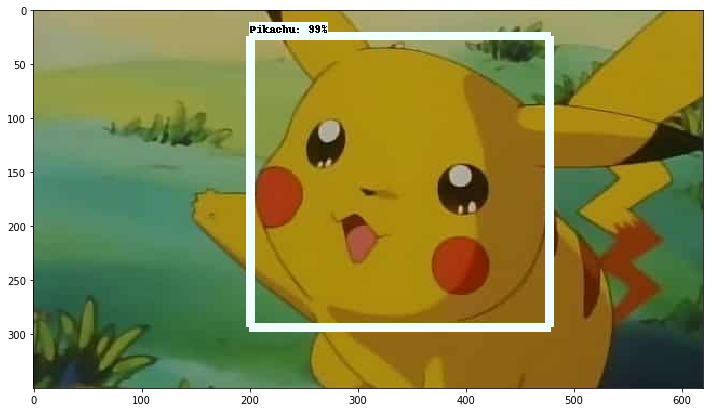

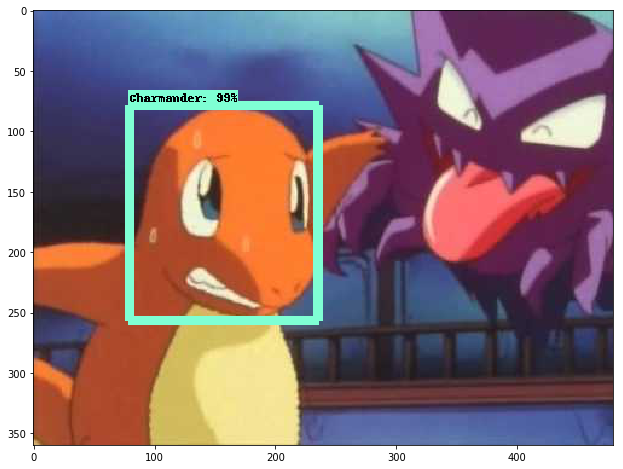

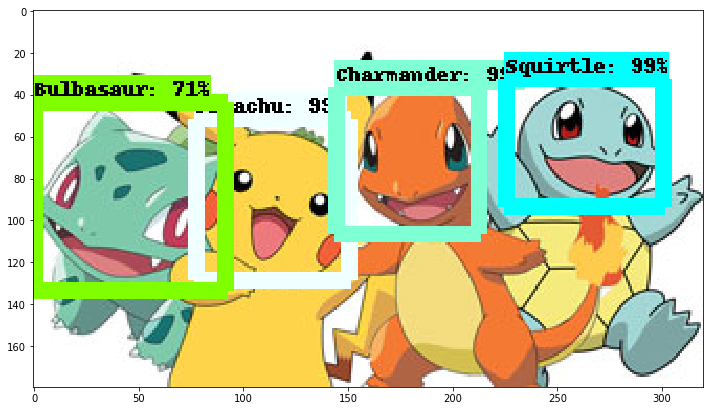

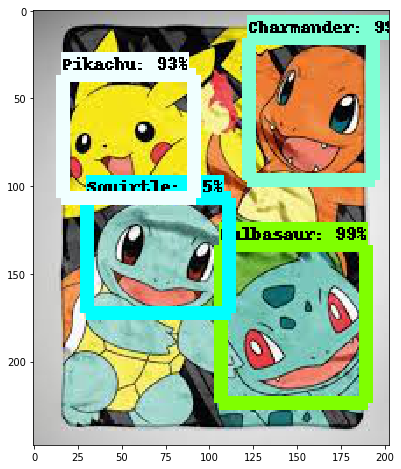

In [31]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      # Actual detection.
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)